# CaseStudy_Week10

## Dataset used : titanic_dataset

#### Do the following on titanic dataset.
#### 1. Load the dataset into python environment
#### 2. Make ‘PassengerId’ as the index column
#### 3. Check the basic details of the dataset
#### 4. Fill in all the missing values present in all the columns in the dataset
#### 5. Check and handle outliers in at least 3 columns in the dataset
#### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column

In [3]:
data=pd.read_csv('titanic_dataset.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Insights :

#### The dataset consists of 891 rows and 11 columns.
#### There are null values in the given dataset. The column 'Age' has 177 null values. The column 'Cabin' has 687 null values and the column 'Embarked' has 2 null values.

## 4. Fill in all the missing values present in all the columns in the dataset

In [7]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
# dropping the columns - Name, Ticket and Cabin 
# dropping 'Cabin' as it is having more than 20 % null values.

data.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


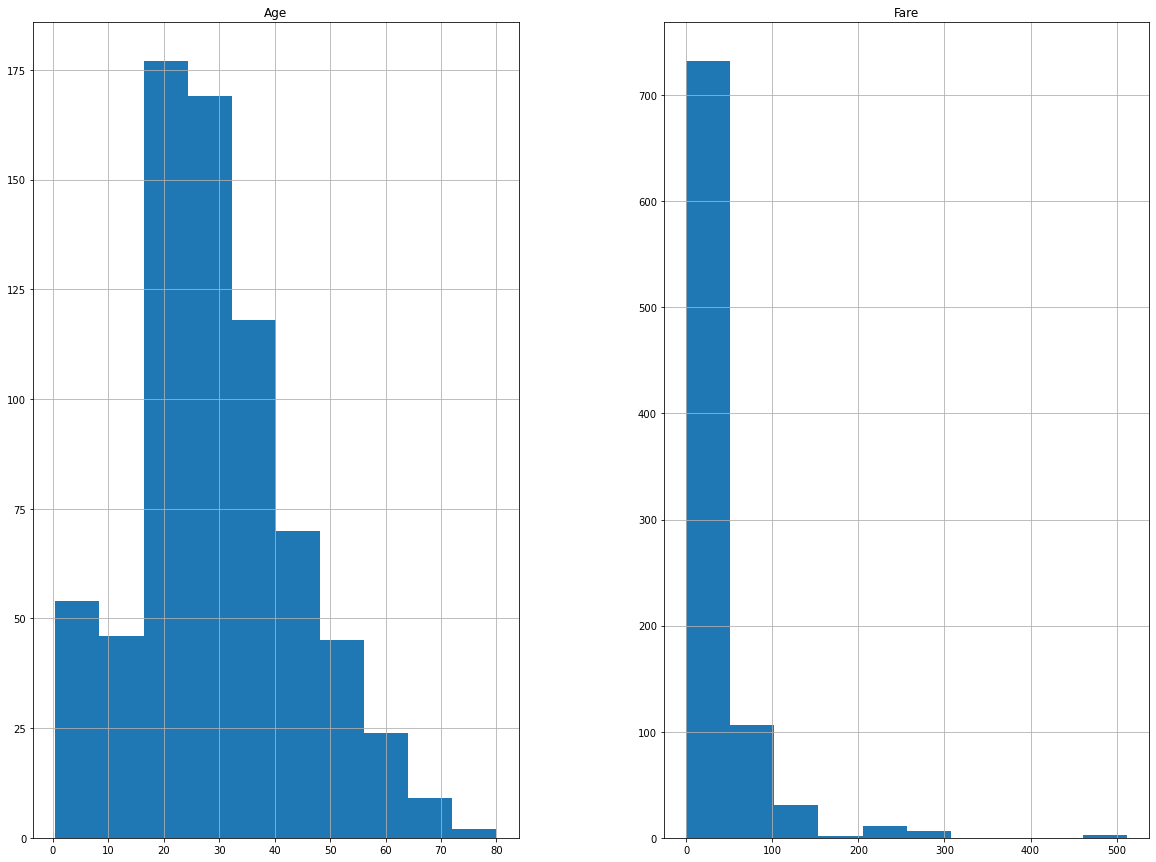

In [9]:
# plotting histogram to find skewness

freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

## Findings :

#### Age is right-skewed and hence the missing values can be filled with median.

In [10]:
# filling null values in 'Age' with the median value

data['Age'].fillna(data['Age'].median(), inplace=True)

In [11]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [13]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Now, the null values in the dataset are filled.

#### Converting categorical variables to numerical variables
#### 1) Sex - using Label Encoding
#### 2) Embarked - using One Hot Encoding

In [14]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
data['Sex']= label.fit_transform(data['Sex']) 
print(data['Sex'].unique())

[1 0]


#### We have used fit_transform() method to apply the functionality of the label encoder pointed by the object to the data variable.

#### So, you see, the data has been transformed into integer labels of [0,1].
#### 1 - Male, 0 - Female

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


In [16]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [17]:
data_edummies=pd.get_dummies(data['Embarked'])

In [18]:
data=pd.concat([data, data_edummies], axis=1)

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S,0,0,1
2,1,1,0,38.0,1,0,71.2833,C,1,0,0
3,1,3,0,26.0,0,0,7.9250,S,0,0,1
4,1,1,0,35.0,1,0,53.1000,S,0,0,1
5,0,3,1,35.0,0,0,8.0500,S,0,0,1


In [20]:
# dropping the column 'Embarked'

data.drop('Embarked', axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1


In [21]:
# checking dtypes of the datset

data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
C             uint8
Q             uint8
S             uint8
dtype: object

## Insights :

#### We have dropped few columns that didn't add value to the end result. The null values are filled and the categorical variables are converted to numerical variables. 

## 5. Check and handle outliers in at least 3 columns in the dataset

In [22]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


#### a) checking the column 'Age'

Text(0.5, 1.0, 'Box plot of Age')

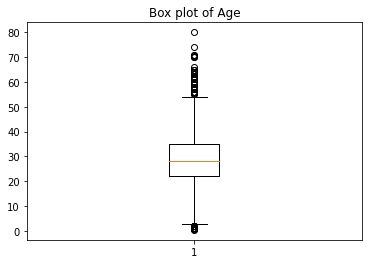

In [23]:
# plotting boxplot to check for outliers

plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [24]:
# Finding IQR (Q3-Q1)

# The data points that fall below Q1-1.5*IQR and the data points that fall above Q3+1.5*IQR are generally considered as outliers.

Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')

In [25]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [26]:
# Q2 = median

data['Age'].median()

28.0

In [27]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('Lower limit is : ', low_lim)
print('Upper limit is : ', up_lim)

Lower limit is :  2.5
Upper limit is :  54.5


#### Findings :

#### We can remove all the values that are above 54.5 and below 2.5. To do this, we will create a loop as follows.

In [28]:
outlier = []
for x in data['Age']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [29]:
# To find the index of the outliers (up_lim)

ind1 = data['Age'] > up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [30]:
# To find the index of the outliers (low_lim)

ind1 = data['Age'] < low_lim
data.loc[ind1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [31]:
# Dropping the outliers from the dataset (up_lim)

data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880], inplace=True)

In [32]:
# Dropping the outliers from the dataset (low_lim)

data.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832], inplace=True)

In [33]:
data.shape

(825, 10)

Text(0.5, 1.0, 'Box plot of Age')

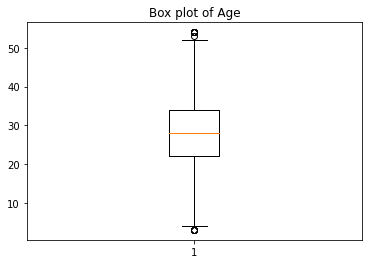

In [34]:
# Plot boxplot to see whether the outliers are reduced

plt.boxplot(data['Age'])
plt.title('Box plot of Age')

#### b) checking the column 'Fare'

Text(0.5, 1.0, 'Box plot of Fare')

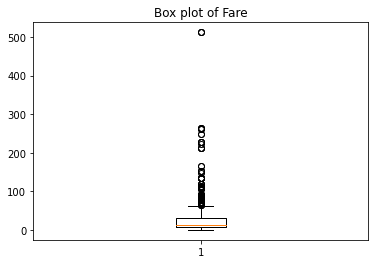

In [35]:
# plotting boxplot to check for outliers

plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [36]:
# Finding IQR (Q3-Q1)

# The data points that fall below Q1-1.5*IQR and the data points that fall above Q3+1.5*IQR are generally considered as outliers.

Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')

In [37]:
print(Q1)
print(Q2)
print(Q3)

7.8958
13.4167
30.0708


In [38]:
# Q2 = median

data['Fare'].median()

13.4167

In [39]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('Lower limit is : ', low_lim)
print('Upper limit is : ', up_lim)

Lower limit is :  -25.366699999999994
Upper limit is :  63.333299999999994


#### Findings :

#### We can remove all the values that are above 63.33 and below -25.36. To do this, we will create a loop as follows.

In [40]:
outlier = []
for x in data['Fare']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [41]:
# To find the index of the outliers (up_lim)

ind1 = data['Fare'] > up_lim
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [42]:
# To find the index of the outliers (low_lim)

ind1 = data['Fare'] < low_lim
data.loc[ind1].index

Int64Index([], dtype='int64', name='PassengerId')

#### No values less than the low_limit.

In [43]:
# Dropping the outliers from the dataset

index = data[(data['Fare'] > up_lim)|(data['Fare'] < low_lim)].index
data.drop(index, inplace=True)

In [44]:
data.shape

(718, 10)

Text(0.5, 1.0, 'Box plot of Fare')

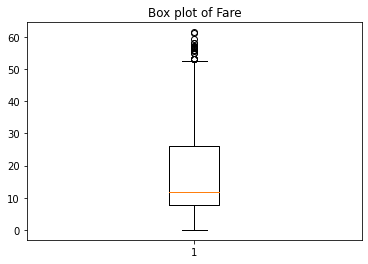

In [45]:
# Plot boxplot to see whether the outliers have reduced

plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

#### c) checking the column 'SibSp'

Text(0.5, 1.0, 'Box plot of SibSp')

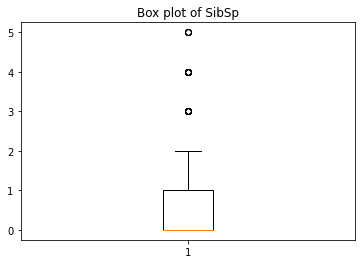

In [46]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [47]:
# Finding IQR (Q3-Q1)

# The data points that fall below Q1-1.5*IQR and the data points that fall above Q3+1.5*IQR are generally considered as outliers.

Q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')

In [48]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [49]:
# Q2 = median

data['SibSp'].median()

0.0

In [50]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('Lower limit is : ', low_lim)
print('Upper limit is : ', up_lim)

Lower limit is :  -1.5
Upper limit is :  2.5


#### Findings :

#### We can remove all the values that are above 2.5 and below -1.5. To do this, we will create a loop as follows.

In [51]:
outlier = []
for x in data['SibSp']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

##### No values less than the low_lim.

In [52]:
# To find the index of the outliers

ind1 = data['SibSp'] > up_lim
data.loc[ind1].index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [53]:
# Dropping the outliers from the dataset

data.drop([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851], inplace=True)

In [54]:
data.shape

(689, 10)

Text(0.5, 1.0, 'Box plot of SibSp')

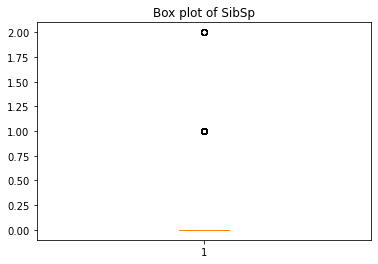

In [55]:
# Plot boxplot to see whether the outliers have reduced

plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

#### d) checking the column 'Pclass'

Text(0.5, 1.0, 'Box plot of Pclass')

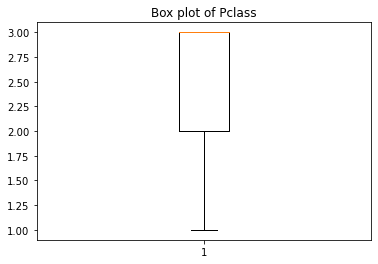

In [56]:
# plotting boxplot to check for outliers

plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

#### No outliers in the column 'Pclass'

## Insights :

#### We have checked for outliers in the columns 'Age', 'Fare', 'SibSp', and 'Pclass' and have removed outliers accordingly. Now, the datset is having 689 rows and 11 columns.

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

<AxesSubplot:>

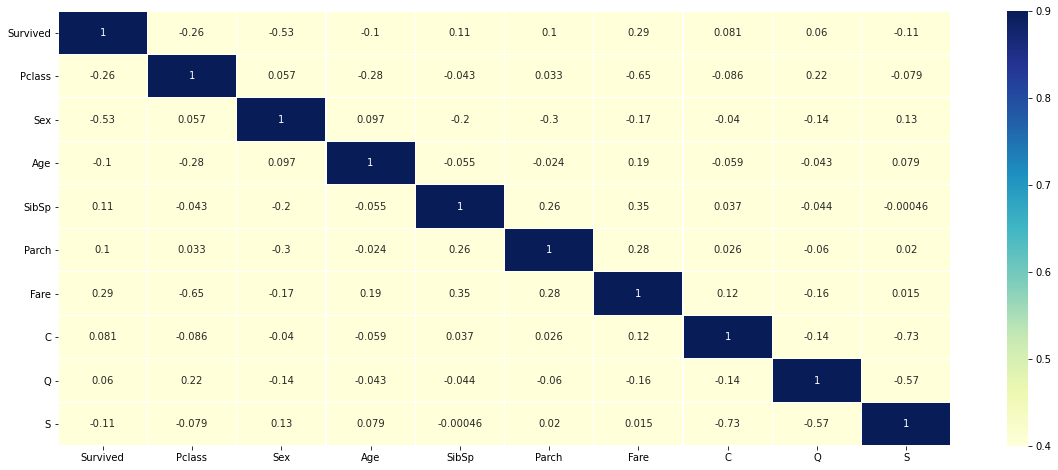

In [57]:
# We are done with the pre-processing steps. Now, let's create a linear regression model.

corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [58]:
y = data['Survived']
x = data.drop('Survived', axis=1)

In [59]:
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.493469,0.687954,28.711176,0.272859,0.269956,16.631246,0.150943,0.098694,0.750363
std,0.723586,0.463665,9.545220,0.501020,0.754625,13.092563,0.358254,0.298467,0.433117
min,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,23.000000,0.000000,0.000000,7.854200,0.000000,0.000000,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,10.500000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,33.000000,0.000000,0.000000,23.450000,0.000000,0.000000,1.000000
max,3.000000,1.000000,54.000000,2.000000,6.000000,61.379200,1.000000,1.000000,1.000000


In [60]:
from sklearn import preprocessing

In [61]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x=pd.DataFrame(x)

In [62]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,689.000000,689.000000,689.000000,689.00000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.746734,0.687954,0.504141,0.13643,0.044993,0.270959,0.150943,0.098694,0.750363
std,0.361793,0.463665,0.187161,0.25051,0.125771,0.213306,0.358254,0.298467,0.433117
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.392157,0.00000,0.000000,0.127962,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.490196,0.00000,0.000000,0.171068,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.588235,0.00000,0.000000,0.382051,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions=model.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is : ', mean_squared_error(y_test, predictions))

from sklearn.metrics import r2_score
print('R squared value is : ', r2_score(y_test, predictions))

MSE is :  0.14075414685235507
R squared value is :  0.3958706394734618


## Insights :

#### We have now performed the min-max scaling with target as 'Survived'. 
##### Below are the MSE and R-squared values on applying linear regression :
#### MSE : 0.14075414685235507
#### R-squared : 0.3958706394734618

#### The model is comparitively good as it is having a low MSE value. The model can be made better by trying other pre-processing steps as required.